In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale,minmax_scale,robust_scale
import statsmodels.formula.api as smf
from statsmodels.api import Logit
from scipy import stats
from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

plt.rcParams['axes.unicode_minus']=False

# import 프로펫
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

%matplotlib inline
matplotlib.rc('font',family='NanumGothic')

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화 추세 패키지
import seaborn as sns

!pip3 install mlxtend
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화 추세 패키지
import seaborn as sns
# 한글 패치
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y~X1+X2+...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
# 예측 / 회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# os 환경
import os

from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true - y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [6]:
product = pd.read_csv('file:///home/piai/바탕화면/파일/online_sales_total_df.csv', encoding='cp949')
product.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,delay_time
0,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P05010300,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
1,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P08030700,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
2,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P05019820,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
3,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P05070100,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
4,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P10020105,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8


# 온라인 판매상품 2년간 총매출 순위
### 온라인 3종 프로펫으로 분기별 수요예측하면 바잉파워 늘릴수 있어서 효율적인 재고관리 가능

In [7]:
df_total_online=product.groupby('item_name').agg({'new_purchase_amt':'sum'}) 
df_total_online.sort_values(by="new_purchase_amt", ascending=False,inplace=True)
df_total_online

,new_purchase_amt
item_name,
백미/유(8kg),7030300
가공용 토종유정란(제주),5449860
오분도미/유(8kg),4050000
백미/유(4kg),2543400
★유기농우유(종이팩/900ml),2371800
...,...
재래종중파(500g/우리씨앗살림농장),2350
유정란(6알/국내산),2300
콜라비(소/600g),2100


##   1.백미/유(8kg), 2.가공용 토종유정란(제주), 3.오분도미/유(8kg)

## 백미/유(8kg)

In [8]:
product = pd.read_csv('file:///home/piai/바탕화면/파일/online_sales_total_df.csv', encoding='cp949')
product.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,delay_time
0,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P05010300,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
1,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P08030700,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
2,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P05019820,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
3,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P05070100,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
4,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P10020105,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8


In [9]:
baekmi_you = product['item_name'] == '백미/유(8kg)'
baekmi = product[baekmi_you]
baekmi

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,delay_time
6,C121449,C121449_20180307_201,모바일,2018M03,수요일,12,2018-03-07,:0:12:35:44,2018-03-15,P01010102,...,Y,Y,Y,Y,690-802,제주시,노형동,1~1019,제주 제주시 노형동 1~1019,8
2681,C297168,C297168_20180218_201,인터넷,2018M02,일요일,20,2018-02-18,:0:20:55:43,2018-02-22,P01010102,...,Y,Y,Y,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍,4
2689,C297168,C297168_20180409_201,인터넷,2018M04,월요일,18,2018-04-09,:0:18:49:59,2018-04-12,P01010102,...,Y,Y,Y,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍,3
2729,C297168,C297168_20180913_201,인터넷,2018M09,목요일,13,2018-09-13,:0:13:22:34,2018-09-20,P01010102,...,Y,Y,Y,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍,7
2736,C297168,C297168_20180924_201,인터넷,2018M09,월요일,0,2018-09-24,:0:00:59:59,2018-09-27,P01010102,...,Y,Y,Y,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23984,C633120,C633120_20190314_201,모바일,2019M03,목요일,11,2019-03-14,:0:11:46:44,2019-03-19,P01010102,...,Y,Y,N,N,697-835,서귀포시,동홍동,119~434,제주 서귀포시 동홍동 119~434,5
24044,C633120,C633120_20190411_201,모바일,2019M04,목요일,17,2019-04-11,:0:17:13:08,2019-04-16,P01010102,...,Y,Y,N,N,697-835,서귀포시,동홍동,119~434,제주 서귀포시 동홍동 119~434,5
24171,C633120,C633120_20190606_201,모바일,2019M06,목요일,20,2019-06-06,:0:20:46:04,2019-06-11,P01010102,...,Y,Y,N,N,697-835,서귀포시,동홍동,119~434,제주 서귀포시 동홍동 119~434,5
24991,C669070,C669070_20191112_100,전화,2019M11,화요일,9,2019-11-12,:0:09:55:36,2019-11-20,P01010102,...,Y,Y,N,N,695-934,제주시,한림읍,협재리,제주 제주시 한림읍 협재리,8


In [10]:
baekmi_data = baekmi[['purchase_date','new_purchase_amt']]
baekmi_data

,purchase_date,new_purchase_amt
6,2018-03-07,30700
2681,2018-02-18,30700
2689,2018-04-09,30700
2729,2018-09-13,30700
2736,2018-09-24,30700
...,...,...
23984,2019-03-14,30700
24044,2019-04-11,30700
24171,2019-06-06,30700
24991,2019-11-12,30700


In [11]:
baekmi_data.rename(columns = {'purchase_date' : 'ds'}, inplace = True)
baekmi_data.rename(columns = {'new_purchase_amt' : 'y'}, inplace = True)
baekmi_data

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
6,2018-03-07,30700
2681,2018-02-18,30700
2689,2018-04-09,30700
2729,2018-09-13,30700
2736,2018-09-24,30700
...,...,...
23984,2019-03-14,30700
24044,2019-04-11,30700
24171,2019-06-06,30700
24991,2019-11-12,30700


In [12]:
baekmi_data=baekmi_data.reset_index()

In [13]:
baekmi_data.drop(['index'], axis = 'columns', inplace=True) 

In [14]:
baekmi_data

,ds,y
0,2018-03-07,30700
1,2018-02-18,30700
2,2018-04-09,30700
3,2018-09-13,30700
4,2018-09-24,30700
...,...,...
165,2019-03-14,30700
166,2019-04-11,30700
167,2019-06-06,30700
168,2019-11-12,30700


In [15]:
#데이터타입변경    
baekmi_data['ds']= pd.to_datetime(baekmi_data['ds'])

In [16]:
m = Prophet() # Default growth='linear'
m.fit(baekmi_data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
218,2020-03-21
219,2020-03-22
220,2020-03-23
221,2020-03-24
222,2020-03-25


In [20]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
218,2020-03-21,45409.188219,14682.704435,59018.706593,45409.187945,45409.188505,-7967.857680,-7967.857680,-7967.857680,-7967.857680,-7967.857680,-7967.857680,0.0,0.0,0.0,37441.330539
219,2020-03-22,45425.987338,15062.586755,59411.804952,45425.987060,45425.987628,-8293.997429,-8293.997429,-8293.997429,-8293.997429,-8293.997429,-8293.997429,0.0,0.0,0.0,37131.989910
220,2020-03-23,45442.786457,26154.147754,68937.115362,45442.786174,45442.786749,1216.991881,1216.991881,1216.991881,1216.991881,1216.991881,1216.991881,0.0,0.0,0.0,46659.778338
221,2020-03-24,45459.585576,37739.089157,78558.583253,45459.585289,45459.585872,12105.977223,12105.977223,12105.977223,12105.977223,12105.977223,12105.977223,0.0,0.0,0.0,57565.562798
222,2020-03-25,45476.384694,23592.422865,67498.470539,45476.384403,45476.384994,694.972852,694.972852,694.972852,694.972852,694.972852,694.972852,0.0,0.0,0.0,46171.357547


In [21]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
163,2020-01-26,36191.239260,13602.749795,56621.495008
164,2020-01-27,45719.027688,24207.119841,68752.370216
165,2020-01-28,56624.812148,34997.156577,78618.263857
166,2020-01-29,45230.606897,24307.414726,67583.875974
167,2020-01-30,46377.502035,25608.361267,66743.172746
168,2020-01-31,44988.076564,22340.320122,65524.887486
169,2020-02-01,36618.173721,13608.138613,58020.742405
170,2020-02-02,36308.833091,13591.754269,57913.284440
171,2020-02-03,45836.621519,23447.250714,67928.481811
172,2020-02-04,56742.405980,34044.465051,76636.884846


In [27]:
m = Prophet(yearly_seasonality=5, changepoint_prior_scale=0.000005, interval_width=0.95) # Default growth='linear'
m.fit(baekmi_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(49.0, 0.5, '매출액')

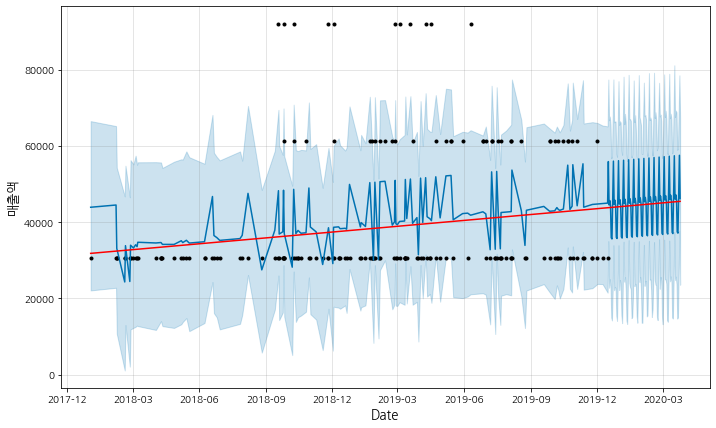

In [28]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.xlabel('Date', fontsize=13)
plt.ylabel('매출액', fontsize=13)

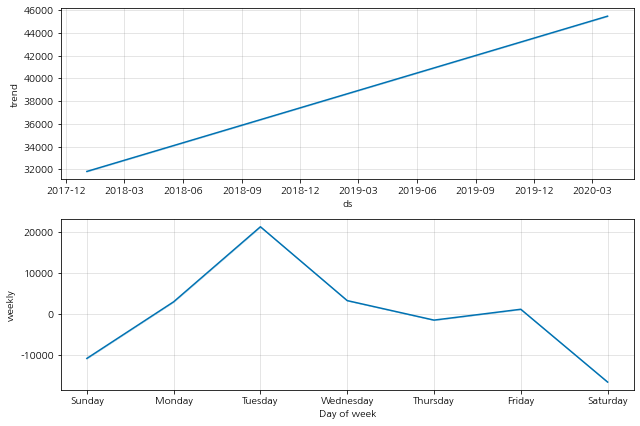

In [29]:
fig2 = m.plot_components(forecast)

# 트렌드와 계절성(주단위, 연단위)이 미치는 현황

In [55]:
# 모델링 파라미터 개선을 통해 모델의 정확도 올린다.
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='200 days', period='50 days', horizon = '100 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2019-02-23 00:00:00 and 2019-09-11 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [56]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-03-03,71417.845376,-1107.112585,138281.449637,30000,2019-02-23
1,2019-03-04,123316.076056,53948.668703,192655.424375,60000,2019-02-23
2,2019-03-08,94161.023727,19868.633313,167627.922838,30000,2019-02-23
3,2019-03-14,130544.668653,59668.989394,200040.903222,90000,2019-02-23
4,2019-03-25,217008.025814,148485.228494,281452.949216,90000,2019-02-23


In [57]:
cutoffs = pd.to_datetime(['2018-09-15', '2018-10-15', '2018-11-04'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='100 days')

INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


In [58]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,2.733276e+09,52280.739493,50387.118771,1.376626,1.217931,1.0
1,11 days,2.629703e+09,51280.632294,47473.748483,1.279514,1.217931,1.0
2,13 days,2.996033e+09,54736.028320,50884.608445,1.399537,1.511968,1.0
3,14 days,2.829728e+09,53195.186984,49477.505172,1.376085,1.441613,1.0
4,15 days,2.415026e+09,49142.915162,45383.467903,1.133783,0.819495,1.0


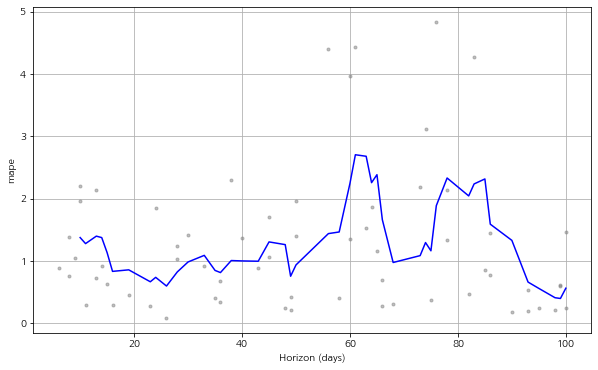

In [59]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## 가공용 토종유정란(제주)

In [30]:
tojong_you = product['item_name'] == '가공용 토종유정란(제주)'
tojong = product[tojong_you]
tojong

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,delay_time
3257,C355132,C355132_20180807_201,전화,2018M08,화요일,9,2018-08-07,:0:09:29:49,2018-08-16,P06020501,...,Y,N,Y,N,690-825,제주시,이도2동,443~699,제주 제주시 이도2동 443~699,9
3258,C355132,C355132_20180906_201,전화,2018M09,목요일,14,2018-09-06,:0:14:41:07,2018-09-13,P06020501,...,Y,N,Y,N,690-825,제주시,이도2동,443~699,제주 제주시 이도2동 443~699,7
3259,C355132,C355132_20181015_201,전화,2018M10,월요일,15,2018-10-15,:0:15:12:32,2018-10-18,P06020501,...,Y,N,Y,N,690-825,제주시,이도2동,443~699,제주 제주시 이도2동 443~699,3
3260,C355132,C355132_20181101_201,전화,2018M11,목요일,9,2018-11-01,:0:09:44:59,2018-11-08,P06020501,...,Y,N,Y,N,690-825,제주시,이도2동,443~699,제주 제주시 이도2동 443~699,7


In [31]:
tojong_data = tojong[['purchase_date','new_purchase_amt']]
tojong_data

,purchase_date,new_purchase_amt
3257,2018-08-07,2096100
3258,2018-09-06,2096100
3259,2018-10-15,838440
3260,2018-11-01,419220


In [32]:
tojong_data.rename(columns = {'purchase_date' : 'ds'}, inplace = True)
tojong_data.rename(columns = {'new_purchase_amt' : 'y'}, inplace = True)
tojong_data

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
3257,2018-08-07,2096100
3258,2018-09-06,2096100
3259,2018-10-15,838440
3260,2018-11-01,419220


In [33]:
m = Prophet() # Default growth='linear'
m.fit(tojong_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


In [34]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
99,2019-02-05
100,2019-02-06
101,2019-02-07
102,2019-02-08
103,2019-02-09


In [35]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
99,2019-02-05,-1.507233e+06,-1.790168e+06,-1.222821e+06,-1.507233e+06,-1.507233e+06,0.0,0.0,0.0,0.0,0.0,0.0,-1.507233e+06
100,2019-02-06,-1.528371e+06,-1.827353e+06,-1.213332e+06,-1.528371e+06,-1.528371e+06,0.0,0.0,0.0,0.0,0.0,0.0,-1.528371e+06
101,2019-02-07,-1.549508e+06,-1.852553e+06,-1.238062e+06,-1.549508e+06,-1.549508e+06,0.0,0.0,0.0,0.0,0.0,0.0,-1.549508e+06
102,2019-02-08,-1.570646e+06,-1.861350e+06,-1.273493e+06,-1.570646e+06,-1.570646e+06,0.0,0.0,0.0,0.0,0.0,0.0,-1.570646e+06
103,2019-02-09,-1.591783e+06,-1.890176e+06,-1.292730e+06,-1.591783e+06,-1.591783e+06,0.0,0.0,0.0,0.0,0.0,0.0,-1.591783e+06


In [36]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
44,2018-12-12,-3.446704e+05,-6.534830e+05,-5.566950e+04
45,2018-12-13,-3.658079e+05,-6.649910e+05,-7.464804e+04
46,2018-12-14,-3.869454e+05,-6.586523e+05,-8.869716e+04
47,2018-12-15,-4.080829e+05,-7.086581e+05,-1.040578e+05
48,2018-12-16,-4.292204e+05,-7.090014e+05,-1.183470e+05
49,2018-12-17,-4.503579e+05,-7.424108e+05,-1.387934e+05
50,2018-12-18,-4.714954e+05,-7.728819e+05,-1.512106e+05
51,2018-12-19,-4.926329e+05,-7.773430e+05,-1.847682e+05
52,2018-12-20,-5.137704e+05,-8.106664e+05,-2.008327e+05
53,2018-12-21,-5.349079e+05,-8.848771e+05,-2.313285e+05


In [37]:
m = Prophet(yearly_seasonality=5, changepoint_prior_scale=0.000005, interval_width=0.95) # Default growth='linear'
m.fit(tojong_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


Text(69.375, 0.5, '매출액')

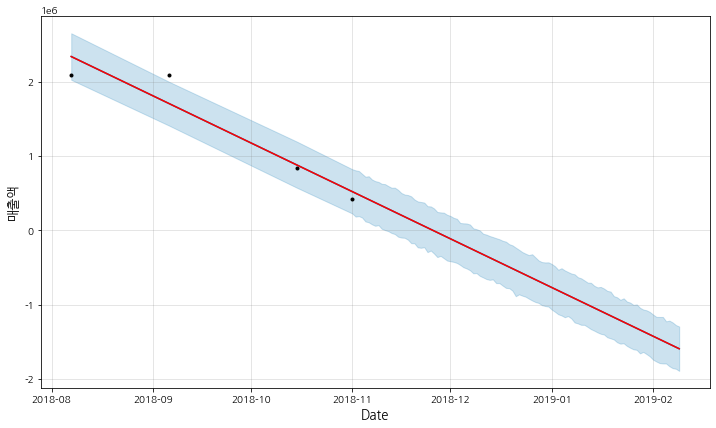

In [38]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.xlabel('Date', fontsize=13)
plt.ylabel('매출액', fontsize=13)

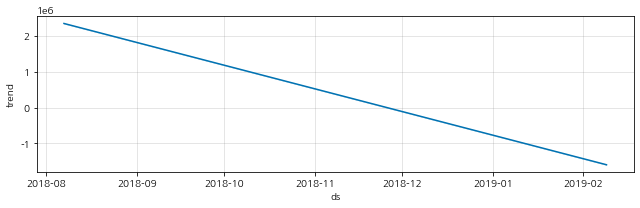

In [39]:
fig2 = m.plot_components(forecast)

In [40]:
# 온라인 총매출에 차지하는 비율 높지만 건수가 부족 -> 시계열 예측 정확도 떨어짐....
# 4건이라 주기성 없는걸로 판단

## 오분도미/유(8kg)

In [41]:
ohbundomi_you = product['item_name'] == '오분도미/유(8kg)'
ohbundomi = product[ohbundomi_you]
ohbundomi

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,delay_time
3738,C375148,C375148_20181109_201,인터넷,2018M11,금요일,20,2018-11-09,:0:20:20:58,2018-11-14,P01010102,...,Y,Y,Y,Y,695-922,제주시,한림읍,귀덕리,제주 제주시 한림읍 귀덕리,5
11672,C548461,C548461_20181109_201,인터넷,2018M11,금요일,15,2018-11-09,:0:15:18:39,2018-11-14,P01010102,...,Y,Y,N,N,695-934,제주시,한림읍,협재리,제주 제주시 한림읍 협재리,5
11716,C548461,C548461_20181221_201,인터넷,2018M12,금요일,19,2018-12-21,:0:19:24:35,2018-12-26,P01010102,...,Y,Y,N,N,695-934,제주시,한림읍,협재리,제주 제주시 한림읍 협재리,5
12668,C592076,C592076_20180720_201,인터넷,2018M07,금요일,16,2018-07-20,:0:16:02:36,2018-07-26,P01010102,...,Y,Y,Y,Y,690-121,제주시,아라1동,NaN,제주 제주시 아라1동,6
12686,C593982,C593982_20180911_201,인터넷,2018M09,화요일,17,2018-09-11,:0:17:40:46,2018-09-18,P01010102,...,Y,Y,Y,Y,697-845,서귀포시,서호동,1~1249,제주 서귀포시 서호동 1~1249,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23804,C626223,C626223_20190517_201,모바일,2019M05,금요일,14,2019-05-17,:0:14:32:24,2019-05-22,P01010102,...,Y,Y,Y,Y,695-942,제주시,한경면,금등리,제주 제주시 한경면 금등리,5
24478,C639675,C639675_20190303_201,인터넷,2019M03,일요일,20,2019-03-03,:0:20:35:49,2019-03-07,P01010102,...,Y,Y,N,N,690-081,제주시,도련1동,NaN,제주 제주시 도련1동,4
24479,C639675,C639675_20190414_201,인터넷,2019M04,일요일,20,2019-04-14,:0:20:13:06,2019-04-18,P01010102,...,Y,Y,N,N,690-081,제주시,도련1동,NaN,제주 제주시 도련1동,4
24481,C639675,C639675_20190609_201,인터넷,2019M06,일요일,18,2019-06-09,:0:18:19:09,2019-06-13,P01010102,...,Y,Y,N,N,690-081,제주시,도련1동,NaN,제주 제주시 도련1동,4


In [42]:
ohbundomi_data = ohbundomi[['purchase_date','new_purchase_amt']]
ohbundomi_data

,purchase_date,new_purchase_amt
3738,2018-11-09,30000
11672,2018-11-09,30000
11716,2018-12-21,30000
12668,2018-07-20,30000
12686,2018-09-11,30000
...,...,...
23804,2019-05-17,30000
24478,2019-03-03,30000
24479,2019-04-14,30000
24481,2019-06-09,30000


In [45]:
ohbundomi_data.rename(columns = {'purchase_date' : 'ds'}, inplace = True)
ohbundomi_data.rename(columns = {'new_purchase_amt' : 'y'}, inplace = True)
ohbundomi_data

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
3738,2018-11-09,30000
11672,2018-11-09,30000
11716,2018-12-21,30000
12668,2018-07-20,30000
12686,2018-09-11,30000
...,...,...
23804,2019-05-17,30000
24478,2019-03-03,30000
24479,2019-04-14,30000
24481,2019-06-09,30000


In [46]:
# 모델링 파라미터 개선을 통해 모델의 정확도 올린다.

In [72]:
m = Prophet(yearly_seasonality=10) # Default growth='linear'
m.fit(ohbundomi_data)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
future = m.make_future_dataframe(periods=90)
future.tail()


,ds
144,2020-03-15
145,2020-03-16
146,2020-03-17
147,2020-03-18
148,2020-03-19


In [74]:
forecast = m.predict(future)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,2020-03-15,53200.285063,46507.235820,76312.180187,53200.284800,53200.285364,7923.111156,7923.111156,7923.111156,-10060.919857,-10060.919857,-10060.919857,17984.031013,17984.031013,17984.031013,0.0,0.0,0.0,61123.396219
145,2020-03-16,53210.480164,75785.825981,103249.082444,53210.479898,53210.480470,36149.430176,36149.430176,36149.430176,16559.059762,16559.059762,16559.059762,19590.370414,19590.370414,19590.370414,0.0,0.0,0.0,89359.910340
146,2020-03-17,53220.675265,71944.562511,101806.901551,53220.674995,53220.675576,33260.448299,33260.448299,33260.448299,12302.147777,12302.147777,12302.147777,20958.300522,20958.300522,20958.300522,0.0,0.0,0.0,86481.123564
147,2020-03-18,53230.870366,55469.203180,85697.006680,53230.870094,53230.870682,16962.661715,16962.661715,16962.661715,-5099.174359,-5099.174359,-5099.174359,22061.836074,22061.836074,22061.836074,0.0,0.0,0.0,70193.532082
148,2020-03-19,53241.065468,76261.264976,106221.137501,53241.065191,53241.065788,38022.785485,38022.785485,38022.785485,15142.825300,15142.825300,15142.825300,22879.960185,22879.960185,22879.960185,0.0,0.0,0.0,91263.850953


In [75]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)



,ds,yhat,yhat_lower,yhat_upper
89,2020-01-20,65382.411867,51283.030344,80045.305340
90,2020-01-21,61751.625275,47086.393401,76656.177781
91,2020-01-22,45066.338631,29307.123880,59563.772718
92,2020-01-23,66100.478938,49832.190339,82422.443070
93,2020-01-24,41785.120966,26919.412557,56927.374347
94,2020-01-25,33886.947751,19031.265501,48503.289979
95,2020-01-26,43564.746876,28725.312236,59052.181888
96,2020-01-27,71108.992202,56109.592794,85924.212399
97,2020-01-28,67760.142587,53977.697968,82756.686004
98,2020-01-29,51229.735679,36919.302470,65826.532583


In [51]:
from fbprophet.plot import add_changepoints_to_plot

In [85]:
m = Prophet(yearly_seasonality=5, changepoint_prior_scale=0.000005, interval_width=0.95) # Default growth='linear'
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)
m.add_seasonality(
    name='yearly', period=7, fourier_order=3, prior_scale=0.1)

m.fit(ohbundomi_data)

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(43.0, 0.5, '매출액')

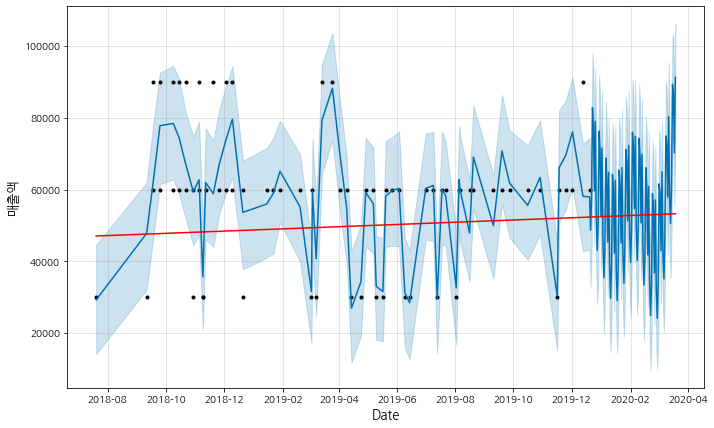

In [86]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.xlabel('Date', fontsize=13)
plt.ylabel('매출액', fontsize=13)

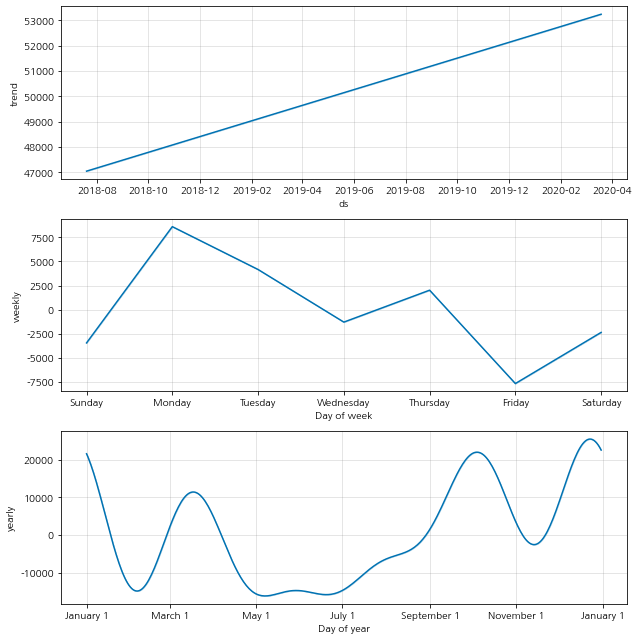

In [87]:
fig2 = m.plot_components(forecast)

# 모델링 파라미터 개선을 통해 모델의 정확도 올린다.
# By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon
# train = initial
# test = cutoff(의미를 모르겠음....)
# test = horizon
# initial , horizon, cutoff = 6, 2, 1